In [ ]:
import os
print(os.getcwd())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
##load data

#set file path to excel data file
file_path = '../data/sus_results.xlsx'


#read excel
df = pd.read_excel(file_path)

#display first few rows of dataframe to check data
print(df.head())

  Unnamed: 0  1  2  3  4  5  6  7  8  9  10
0       CECS  4  1  3  4  5  5  4  3  5   2
1       CECS  5  1  5  3  5  1  5  1  5   1
2       CECS  5  1  5  1  5  1  4  1  5   1
3       CECS  4  2  5  3  3  2  5  1  5   3
4       CECS  4  2  4  2  4  2  4  2  4   2


In [ ]:
##clean data

#check for missing values
print(df.isnull().sum())

#fill missing values with 0
df = df.fillna(0)

#check cleaned data
print(df.head())

In [5]:
##descriptive stat

stats = df.describe()
print("Descriptive stat for dataset:")
print(stats)

Descriptive stat for dataset:
               1          2          3          4         5          6  \
count  50.000000  50.000000  50.000000  50.000000  50.00000  50.000000   
mean    4.180000   1.520000   4.420000   2.120000   4.32000   1.800000   
std     0.560248   0.579937   0.641745   1.222911   0.62073   0.968904   
min     3.000000   1.000000   3.000000   1.000000   3.00000   1.000000   
25%     4.000000   1.000000   4.000000   1.000000   4.00000   1.000000   
50%     4.000000   1.000000   4.500000   2.000000   4.00000   2.000000   
75%     4.750000   2.000000   5.000000   3.000000   5.00000   2.000000   
max     5.000000   3.000000   5.000000   5.000000   5.00000   5.000000   

            7          8          9         10  
count  50.000  50.000000  50.000000  50.000000  
mean    4.020   1.400000   4.180000   2.320000  
std     0.714   0.638877   0.896478   1.150687  
min     3.000   1.000000   3.000000   1.000000  
25%     4.000   1.000000   4.000000   1.000000  
50%     4

In [6]:
##highest and lowest scoring questions

#compute mean for each question
mean_scores = df.iloc[:, 1:].mean()
print("Mean scores per question:")
print(mean_scores)

#identify highest and lowest scoring questions
highest_question = mean_scores.idxmax()
lowest_question = mean_scores.idxmin()
print(f"Highest scoring question: Question {highest_question}")
print(f"Lowest scoring question: Question {lowest_question}")


Mean scores per question:
1     4.18
2     1.52
3     4.42
4     2.12
5     4.32
6     1.80
7     4.02
8     1.40
9     4.18
10    2.32
dtype: float64
Highest scoring question: Question 3
Lowest scoring question: Question 8


In [7]:
##standard deviation

#compute standard deviation for each question
std_dev_scores = df.iloc[:, 1:].std()
print("Standard deviation per question:")
print(std_dev_scores)


Standard deviation per question:
1     0.560248
2     0.579937
3     0.641745
4     1.222911
5     0.620730
6     0.968904
7     0.714000
8     0.638877
9     0.896478
10    1.150687
dtype: float64


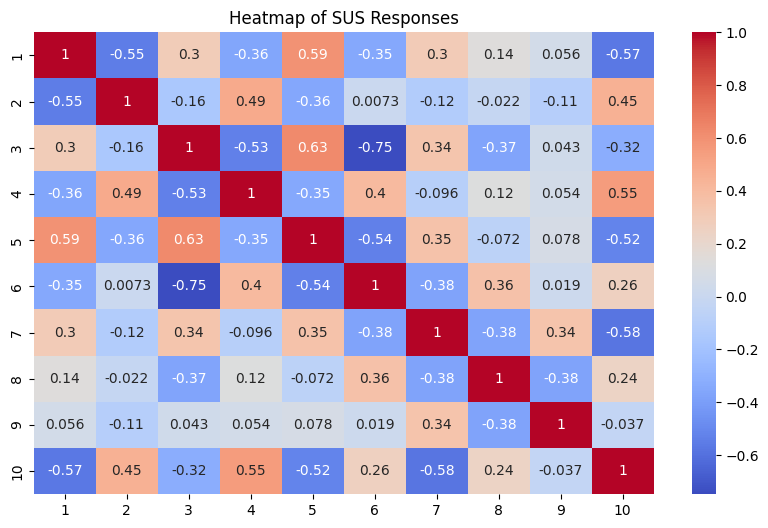

In [9]:
##plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of SUS Responses')
plt.show()

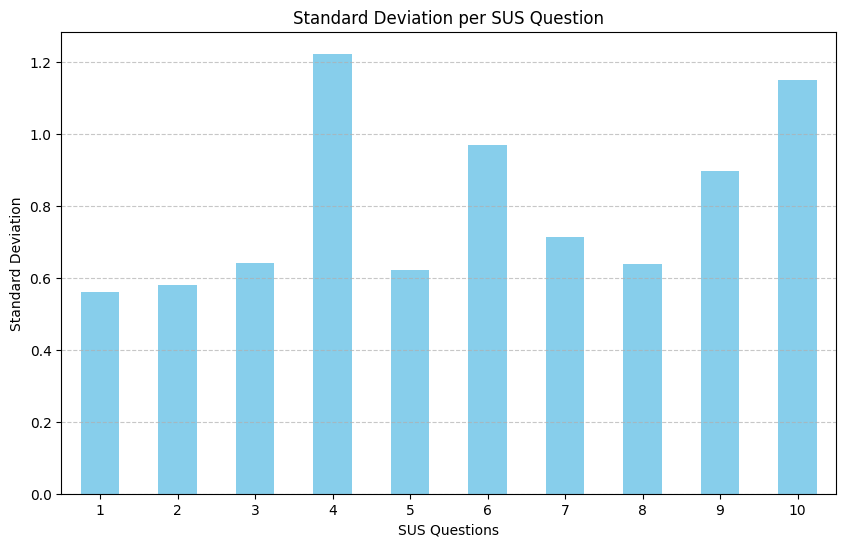

In [ ]:
##standard deviation bar plot

import matplotlib.pyplot as plt

#exclude the first column (college names) and calculate standard deviation
std_devs = df.iloc[:, 1:].std()

#plot standard deviation as a bar chart
plt.figure(figsize=(10, 6))
std_devs.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation per SUS Question')
plt.xlabel('SUS Questions')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


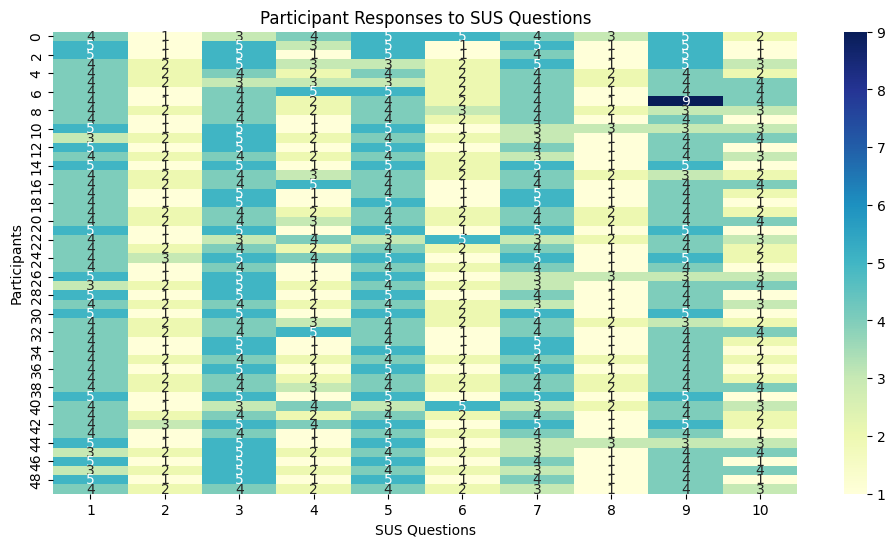

In [12]:
#heatmap for participants

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.iloc[:, 1:], cmap='YlGnBu', annot=True, cbar=True)
plt.title('Participant Responses to SUS Questions')
plt.xlabel('SUS Questions')
plt.ylabel('Participants')
plt.show()


In [13]:
##save the cleaned and processed data

output_file_path = '../output/processed_data.csv'
df.to_csv(output_file_path, index=False)
print(f"Cleaned and processed data saved to {output_file_path}")


Cleaned and processed data saved to ../output/processed_data.csv
